In [4]:
import pandas as pd
import numpy as np
import seaborn as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
df=pd.read_excel('/content/CarPrice_regression .xlsx')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
df=df.replace('gas',1)
df=df.replace('diesel',0)
df=df.replace('std',1)
df=df.replace('turbo',0)
df=df.replace('two',1)
df=df.replace('four',0)
df=df.replace('sedan',0)
df=df.replace('hatchback',1)
df=df.replace('convertible',2)
df=df.replace('wagon',3)
df=df.replace('hardtop',4)
df=df.replace('front',1)
df=df.replace('rear',0)
df=df.replace('4wd',0)
df=df.replace('rwd',1)
df=df.replace('fwd',2)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,1,2,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,1,2,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,1,1,1,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,0,0,2,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,0,0,0,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,1,0,0,1,1,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,0,0,0,1,1,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,1,0,0,1,1,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,0,0,0,1,1,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
corr = df.corr()
corr

<ipython-input-7-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,-0.125568,-0.067729,-0.190352,0.127347,-0.104650,-0.051483,0.129729,0.170636,...,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,0.194311,0.059866,0.664073,0.120329,0.111150,-0.212471,-0.531954,-0.357612,...,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,-0.125568,0.194311,1.000000,0.401397,0.191491,0.063267,0.051874,-0.040070,-0.308346,-0.212679,...,-0.217275,-0.069594,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.067729,0.059866,0.401397,1.000000,0.031792,0.023226,0.153897,-0.057191,-0.257611,-0.234539,...,-0.324902,-0.108217,-0.212614,-0.222982,-0.295541,-0.241685,0.183383,0.202362,0.254416,-0.177926
doornumber,-0.190352,0.664073,0.191491,0.031792,1.000000,0.179162,0.004549,-0.137757,-0.447357,-0.398568,...,-0.197379,-0.020742,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.127347,0.120329,0.063267,0.023226,0.179162,1.000000,-0.184826,-0.254768,-0.036182,0.024256,...,0.111945,0.085160,0.166794,-0.064799,-0.065020,0.090468,-0.028868,-0.118902,-0.136654,0.062789
drivewheel,-0.104650,0.111150,0.051874,0.153897,0.004549,-0.184826,1.000000,0.113823,-0.366828,-0.416076,...,-0.573813,-0.409914,-0.512709,0.192827,-0.018903,-0.445806,0.139905,0.503655,0.549492,-0.490739
enginelocation,-0.051483,-0.212471,-0.040070,-0.057191,-0.137757,-0.254768,0.113823,1.000000,0.187790,0.050989,...,-0.050468,-0.196826,-0.185042,0.138455,0.019762,-0.317839,-0.198461,0.153487,0.102026,-0.324973
wheelbase,0.129729,-0.531954,-0.308346,-0.257611,-0.447357,-0.036182,-0.366828,0.187790,1.000000,0.874587,...,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,-0.212679,-0.234539,-0.398568,0.024256,-0.416076,0.050989,0.874587,1.000000,...,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


<ipython-input-8-7d051bf46edd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sp.heatmap(df.corr(),annot=True,cmap="YlGnBu")


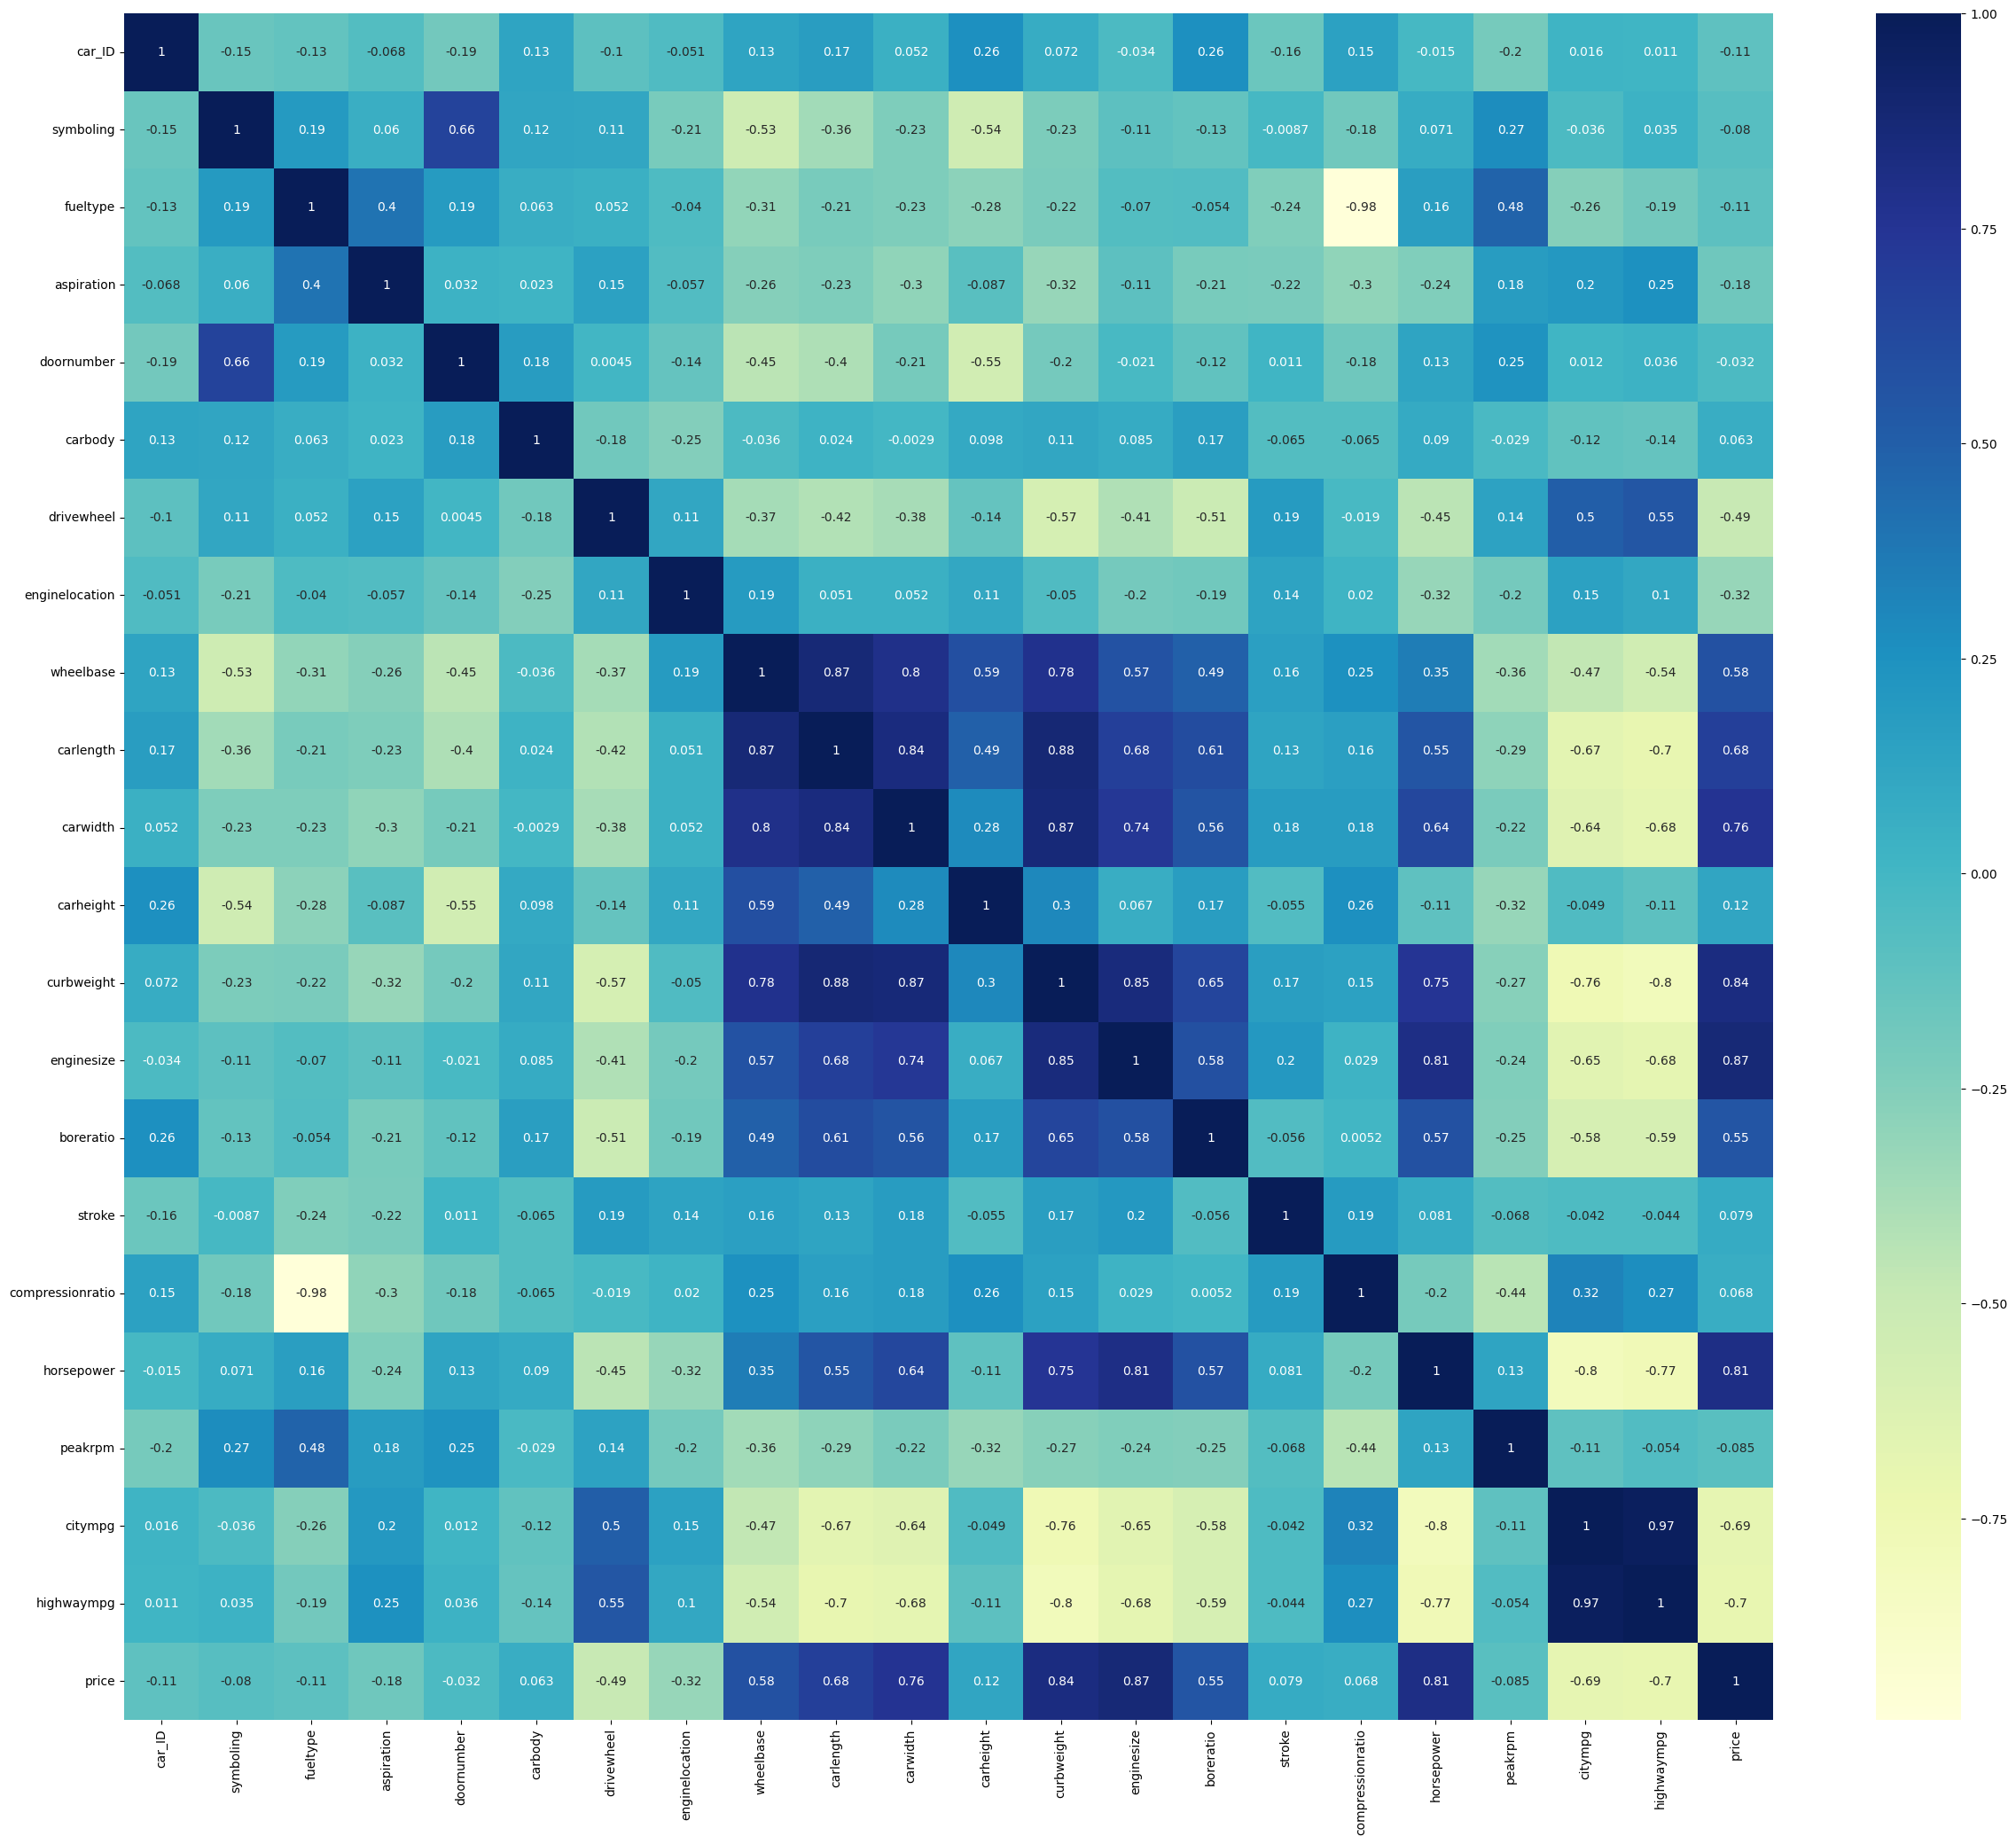

In [8]:
plt.figure(figsize = (30, 25))
sp.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [9]:
x=df[['wheelbase','carlength',	'carwidth',	'enginesize','boreratio','horsepower']]
y=df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train,y_train)

print('Intercept:\n',regr.intercept_)
print('Coefficient:\n',regr.coef_)

Intercept:
 -56653.27668548017
Coefficient:
 [ 122.99269763  -19.92678617  696.49898732   90.28254037 -623.20425954
   56.25078033]


In [11]:
#price=(Intercept)+(wheelbase_coeff)(x1)+(carlength_coeff)(x2)+(carwidth_coeff)*(x3)+(enginesize_coeff)*(x4)+(boreratio_coeff)*(x4)+(horsepower_coeff)*(x5)
price=(-56653.27668548017)+(122.99269763)*(88.6	)+(-19.92678617)*(168.8)+(696.49898732)*(64.1)+(90.28254037)*(130)+(-623.20425954)*(3.47)+(56.25078033)*(111)
print('Price:\n',price)
pred=regr.predict(x_test)
pred

Price:
 11343.867990380028


array([ 5925.65356168,  6272.85605433, 17810.7736389 , 32674.64243679,
        7225.58496975, 16004.13144569, 18727.47646278,  6272.85605433,
        7701.07993211,  6795.84851565,  7622.8570448 ,  6272.85605433,
        7724.91583491, 13662.97840954, 12885.95017416,  8219.78193567,
       17871.42266627, 31155.1883338 ,  6871.32052747,  6690.24646711,
        6144.8482095 , 11787.18838807, 11407.89631426, 18316.18835464,
       11899.47494974, 11449.52306318, 11800.91196756,  5925.65356168,
       17778.54467275,  6310.08563393, 10147.25891899,  6781.90968347,
       17778.54467275, 15178.15527972,  9937.64744696,  9463.53833454,
        7386.12045829, 29182.81491782, 23089.310174  ,  6494.68210038,
        8057.1001812 ])

In [12]:
test_rmse =(np.sqrt(mean_squared_error(y_test,pred)))
test_r2= r2_score(y_test,pred)

print("test RMSE :",test_rmse)
print("r2 score :",test_r2)

test RMSE : 2641.2236245859895
r2 score : 0.8978832742896781


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


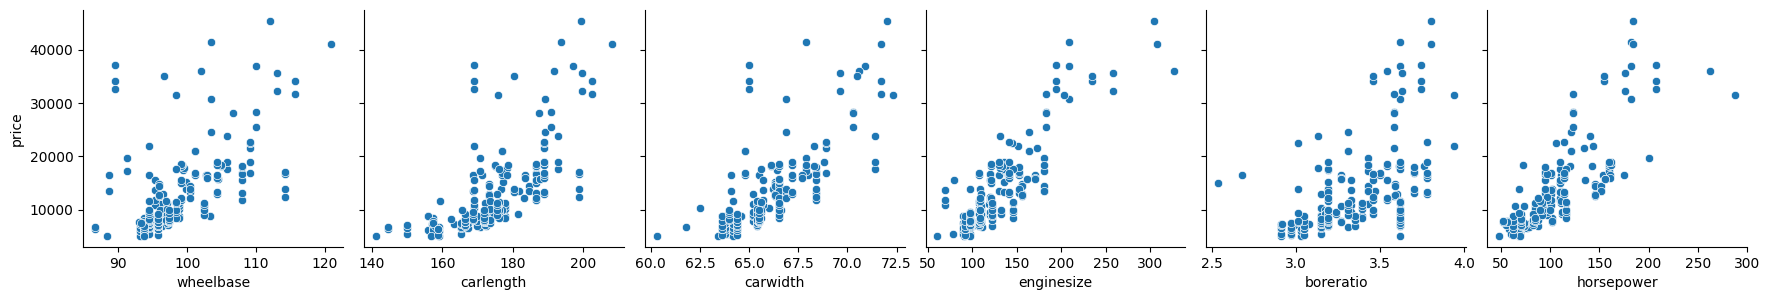

In [13]:
pp = sp.pairplot(data=df,
                  y_vars=['price'],
                  x_vars=['wheelbase','carlength',	'carwidth',	'enginesize','boreratio','horsepower'],size=3)